## Activity 1: Carry Out Mapping to Gaussian Distribution of Numeric Features from the Given Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

import sklearn as sk
from scipy import stats
from sklearn import preprocessing


# read the downloaded input data (marketing data)
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson07/Dataset/bank.csv', sep=';')


In [5]:
numeric_df = df._get_numeric_data()
numeric_df.head()


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [6]:
numeric_df_array = np.array(numeric_df) # converting to numpy arrays for more efficient computation

loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 1.98749e-70
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.08647e-278
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


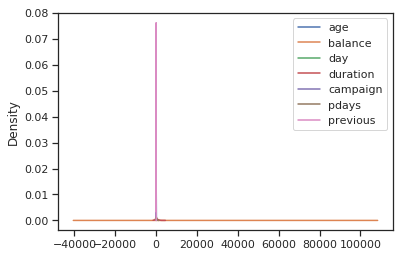

In [7]:
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)

# density plots of the features to check the normality
columns_to_normalize.plot.kde(bw_method=3)


In [0]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)


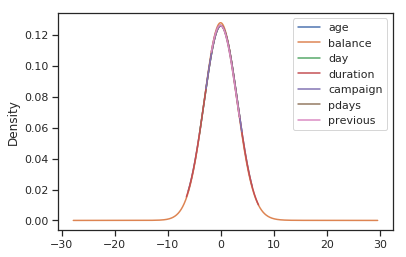

In [9]:
normalized_columns.plot.kde(bw_method=3)